# <font color = green>Import Library 📚

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

# <font color = orange> Create Classifier 🛠

In [2]:
faceClassifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyeClassifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
smileClassifier = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_smile.xml')

## Q1 Load the following image and detect as much as you can all faces
____________________________________

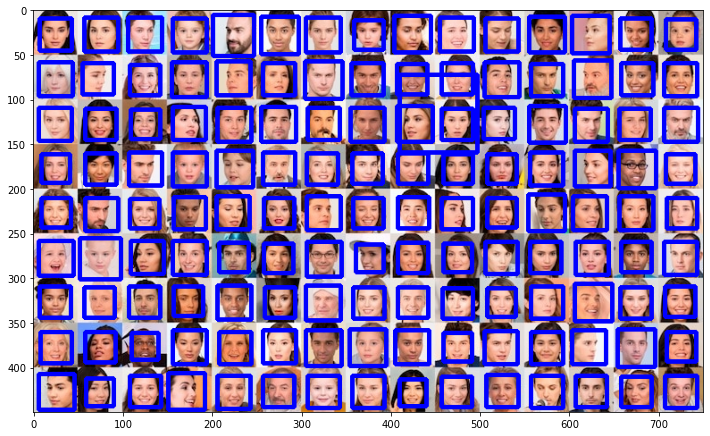

In [3]:
img = cv2.imread('faces.jpg')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceClassifier.detectMultiScale(gray_img, scaleFactor = 1.03, minNeighbors = 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 3)

plt.figure(figsize=(12,12))
plt.imshow(img[:,:,::-1])

## Q2 Load the following image and detect faces,eye,smile and write under everydetection label “Peter” ,”eye” ,”smile” as arranged.
_______________________________________

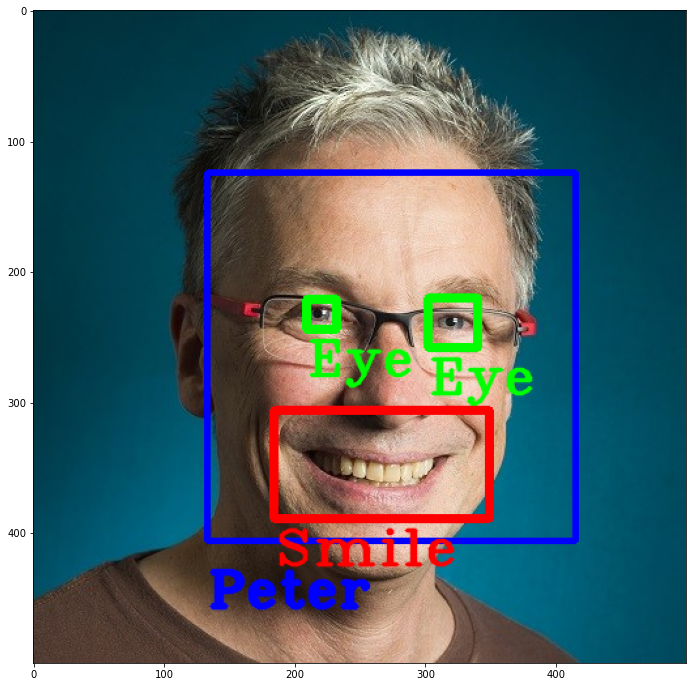

In [4]:
img = cv2.imread('peter.jpg')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceClassifier.detectMultiScale(gray_img, scaleFactor = 1.03, minNeighbors = 5)

for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255,0,0), 3)
    
    face = gray_img[y:y+h, x:x+w]
    eyes = eyeClassifier.detectMultiScale(face, scaleFactor = 1.03, minNeighbors = 5)
    smile = smileClassifier.detectMultiScale(face, scaleFactor = 1.1, minNeighbors = 5, minSize=(70,70))
    
    font = cv2.FONT_HERSHEY_COMPLEX_SMALL
    cv2.putText(img, 'Peter',(x , y+h+50), font, 2, (255, 0, 0), 3, cv2.LINE_AA )
    
    for x2,y2,w2,h2 in eyes:
        cv2.rectangle(img,(x+x2, y+y2),(x+x2+w2,y+y2+h2),(0,255,0),5)
        cv2.putText(img, 'Eye',(x + x2 , y+y2+h2+35), font, 2, (0, 255, 0), 2, cv2.LINE_AA )

    for x3,y3,w3,h3 in smile:
        cv2.rectangle(img,(x+x3,y+y3),(x+x3+w3,y+y3+h3),(0,0,255),5)
        cv2.putText(img, 'Smile',(x + x3 , y+y3+h3+35), font, 2, (0, 0, 255), 2, cv2.LINE_AA )
            
plt.figure(figsize=(12,12))
plt.imshow(img[:,:,::-1])

## Q3 Run your camera stream and make detection for faces,eye,smile and write under every detection label “me” ,”eye” ,”smile” as arranged. Make circle for eye and others rectangle
__________________________________________

In [5]:
cap = cv2.VideoCapture(0)



while cap.isOpened():
    ret, frame = cap.read()
    
    if ret:
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = faceClassifier.detectMultiScale(gray_frame, scaleFactor = 1.03, minNeighbors = 5)

    
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (255,0,0), 3)

            face = gray_frame[y:y+h, x:x+w]
            eyes = eyeClassifier.detectMultiScale(face, scaleFactor = 1.5, minNeighbors = 7)
            smile = smileClassifier.detectMultiScale(face, scaleFactor = 1.1, minNeighbors = 5, minSize=(70,70))

            font = cv2.FONT_HERSHEY_COMPLEX_SMALL
            cv2.putText(frame, 'ME',(x , y+h+50), font, 2, (255, 0, 0), 3, cv2.LINE_AA )

            for x2,y2,w2,h2 in eyes:

                cv2.circle(frame, ((x+x2+x+x2+w2)//2, (y+y2+y+y2+h2)//2), w2, (0,255,0), 5)
                cv2.putText(frame, 'Eye',(x + x2 , y+y2+h2+35), font, 2, (0, 255, 0), 2, cv2.LINE_AA )

            for x3,y3,w3,h3 in smile:
                cv2.rectangle(frame,(x+x3,y+y3),(x+x3+w3,y+y3+h3),(0,0,255),5)
                cv2.putText(frame, 'Smile',(x + x3 , y+y3+h3+35), font, 2, (0, 0, 255), 2, cv2.LINE_AA )
    
    cv2.imshow('My_image', frame)
    k=cv2.waitKey(1)
    if k==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
